# Задание 4го семенара

    gamma = .2
    T = 400


![](Task.png)


In [1]:
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np

In [22]:
u0 = [0.5, 1.1, 0.7]
v0 = [0.5, 2, 1]


gamma = .2
st = .1
t0 = 0 + st
tf = 100

def lotkavolterra(t, z):
    u, v = z
    return [u*(1-v), gamma*v*(u - 1)]

sol = [solve_ivp(lotkavolterra, [t0, tf], [u0[i], v0[i]], max_step=st) for i in range(3)]

t = np.arange(t0-2*st, tf, st)

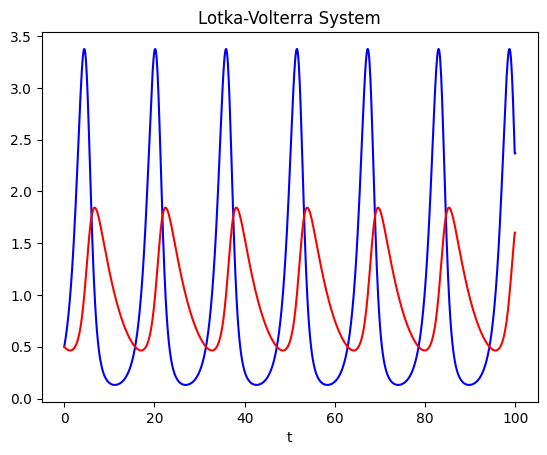

In [10]:
sol = solve_ivp(lotkavolterra, [t0, tf], [u0[0], v0[0]], max_step=st)

t = np.linspace(0, 100, 1001)



plt.plot(t, (sol.y)[0], color="blue", label='жертва')
plt.plot(t, (sol.y)[1], color="red", label='хищьник')


plt.xlabel('t')
plt.title('Lotka-Volterra System')
plt.show()

In [45]:
def Position(mas, posit, const):
    p = posit
    while mas[p-1] < const or mas[p] >= const:
        p+=1
    return p

In [46]:
def Period_in_point(mas, start, f_const):
    a = Position(mas, start, f_const)
    b = Position(mas, a + 1, f_const)
    c = Position(mas, b + 1, f_const)

    if (abs(2*b - a - c) <= 1): return b-a
    else: return -1

In [47]:
def Amplitude(mas):
    arr = mas[40:]
    return(max(arr)-min(arr))

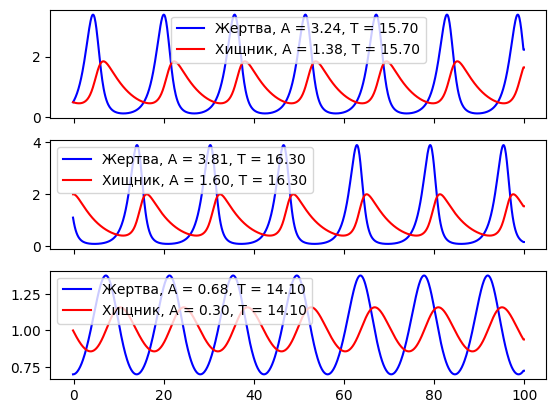

In [50]:
u0 = [0.5, 1.1, 0.7]
v0 = [0.5, 2, 1]


gamma = .2
t0 = 0
tf = 100
st = .1

def lotkavolterra(t, z):
    u, v = z
    return [u*(1-v), gamma*v*(u - 1)]

sol = [solve_ivp(lotkavolterra, [t0, tf], [u0[i], v0[i]], max_step=st, min_step=st) for i in range(3)]

t = np.arange(t0-2*st, tf, st)


fig, ax = plt.subplots(3, 1, sharex=True)

for i in range(3):
    A0 =Amplitude((sol[i].y)[0])
    A1 =Amplitude((sol[i].y)[1])
    T0 =Period_in_point((sol[i].y)[0], 10, 1)*st
    T1 =Period_in_point((sol[i].y)[1], 10, 1)*st

    ax[i].plot(t, (sol[i].y)[0], color="blue", label=f'Жертва, A = {A0:.2f}, T = {T0:.2f}')
    ax[i].plot(t, (sol[i].y)[1], color="red", label=f'Хищник, A = {A1:.2f}, T = {T1:.2f}')

    ax[i].legend()


plt.show()